In [1]:
%matplotlib inline
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
plt.style.use('seaborn-notebook')

In [2]:
data = pd.read_csv('../data/table.csv', index_col=0)
x_R = data['x/R'].values
t = data['MJD'].values
y = np.arccos(x_R)

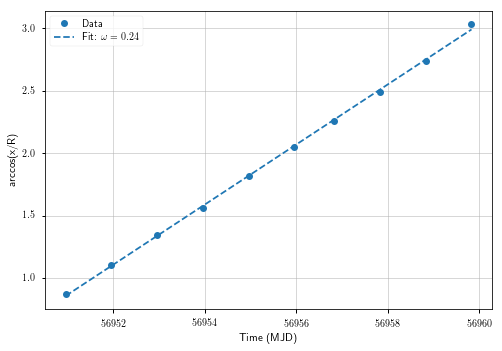

In [4]:
slope, intercept, r, p, std_err = linregress(t, y)

model = lambda t: slope*t + intercept

plt.plot(t, y, 'C0o', label='Data')
plt.plot(t, model(t), 'C0--', label=r'Fit: \omega={:.2f}'.format(slope))
plt.ylabel('arccos(x/R)')
plt.xlabel('Time (MJD)')
plt.grid(True, alpha=.5)
plt.legend()